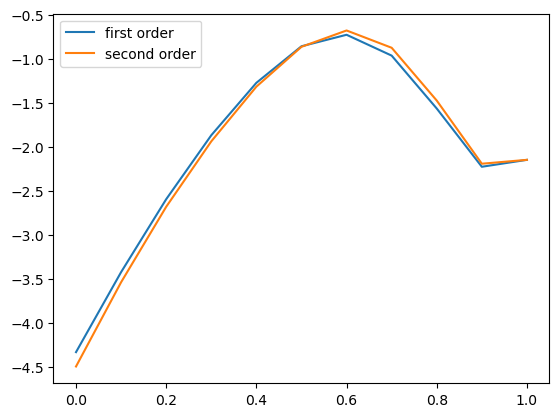

In [11]:
import numpy as np
import matplotlib.pyplot as plt

F=lambda x,t:np.sin(2*np.pi*x)*np.sin(4*np.pi*t)
a=lambda t:10*np.sin(t)
b=lambda t:4*np.sin(6*t)
f=lambda x:(1-x)*x

M=10
dt=0.05
T=2.5
nu=0.1
# first order
dx=1/M
v1=np.zeros((M+1,int(T/dt)+1))
v1[:,0]=f(np.linspace(0,1,M+1))
for n in range(1,int(T/dt)+1):
    v1[M,n]=b(n*dt)
    for i in range(1,M):
        v1[i,n]=v1[i,n-1]+nu*dt/dx**2*(v1[i+1,n-1]-2*v1[i,n-1]+v1[i-1,n-1])+dt*F(i*dx,n*dt)
    v1[0,n]=v1[1,n]-dx*a(n*dt)

# second order
dx=1/(M-1/2)
v2=np.zeros((M+1,int(T/dt)+1))
for n in range(1,int(T/dt)+1):
    v2[M,n]=b(n*dt)
    for i in range(1,M):
        v2[i,n]=v2[i,n-1]+nu*dt/dx**2*(v2[i+1,n-1]-2*v2[i,n-1]+v2[i-1,n-1])+dt*F((i-1/2)*dx,n*dt)
    v2[0,n]=v2[1,n]-dx*a(n*dt)

x=np.linspace(0,1,M+1)
t=2
plt.plot(x,v1[:,int(t/dt)],x,v2[:,int(t/dt)])
plt.legend(['first order','second order'])
plt.show()